<a href="https://colab.research.google.com/github/engineerinvestor/Portfolio-Analysis/blob/main/Visualization/Financial_Independence_(FI)_Goals_and_Net_Worth_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Independence (FI) Goals and Net Worth Visualization

Name: Engineer Investor ([@egr_investor](https://x.com/egr_investor))

Date: 05/25/2024

## Introduction

Welcome to this tutorial on visualizing Financial Independence (FI) goals and net worth over time using Python and Matplotlib. Tracking your net worth and understanding how it aligns with your FI goals is a crucial part of personal finance management. This tutorial will guide you through the process of creating a comprehensive and visually appealing plot that displays your net worth progression alongside key FI milestones.

### Objectives

By the end of this tutorial, you will be able to:
- Generate a plot of your net worth over time.
- Highlight significant Financial Independence goals such as Lean FI, Safe FI, and Cozy FI.
- Understand the concept of the Safe Withdrawal Rate (SWR) and how it applies to your financial planning.
- Customize the plot to suit your preferences and data.

### Prerequisites

To follow along with this tutorial, you should have a basic understanding of:
- Python programming
- Using libraries such as Matplotlib and NumPy
- Personal finance concepts, particularly those related to financial independence and safe withdrawal rates

### Getting Started

Before we dive into the code, ensure you have the necessary Python libraries installed. You can install them using pip:

```bash
pip install matplotlib numpy
```

### Dataset

For this tutorial, we will use an anonymized sample dataset. The dataset contains:
- A list of dates spanning from January 1, 2019, to May 15, 2024.
- Corresponding net worth values for these dates, showing a progression over time with some random variations to mimic real-world data.

### Overview of the Tutorial

1. **Generating the Dataset**: We'll start by creating a sample dataset to use for plotting.
2. **Plotting Net Worth**: You'll learn how to plot your net worth over time.
3. **Adding FI Goals**: We'll add horizontal lines to represent different FI goals based on a safe withdrawal rate.
4. **Customizing the Plot**: Finally, we'll customize the plot to make it informative and visually appealing.

Let's get started by generating our sample dataset and visualizing our net worth!



# Code

## Initialize environment

In [165]:
!pip install matplotlib numpy

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import random
from datetime import datetime, timedelta
from typing import List

## Net worth vs. time visualization

In [3]:
def plot_net_worth(date_list: List[datetime], net_worth_list: List[float],
                   end_date: datetime = datetime.today()) -> None:
    """
    Plots the net worth over time.

    Parameters:
        date_list (List[datetime]): List of dates.
        net_worth_list (List[float]): List of net worth values corresponding to the dates in thousands ($1k).
        end_date (datetime): The end date for the x-axis limit.
    """
    # Initialize the plot with specific size and styles
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor('xkcd:light grey')
    ax.set_facecolor('xkcd:black')

    # Assuming 'dates' is a list of date strings in 'mm/dd/YYYY' format
    date_list = [datetime.strptime(date, '%m/%d/%Y').date() for date in date_list]

    # Convert net worth list to millions for plotting
    net_worth_m = [i / 1000 for i in net_worth_list]

    # Plot the net worth line and fill under the line
    ax.plot(date_list, net_worth_m, linewidth=3)
    ax.fill_between(date_list, net_worth_m, alpha=0.3)

    # Highlight the last point
    ax.plot(date_list[-1], net_worth_m[-1], marker=(5, 1), markersize=10, color='orange')

    # Date formatting for x-axis
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    # Set limits, labels, and title
    ax.set_xlim([datetime(2019, 1, 1), end_date])
    ax.set_ylim([0, max(net_worth_m) * 1.1])
    ax.set_title('Net Worth', fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.set_ylabel('Net Worth ($M)', fontsize=16)

    # Enable grid and set tick sizes
    ax.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Show the plot
    plt.show()

# Example usage:
# plot_net_worth(date_list, net_worth_list, datetime(2024, 5, 15))

## Visualize progress relative to financial independence (FI) goals

In [4]:
def plot_fi_goals(net_worth_list: List[float], date_list: List[datetime], swr: float = 0.035,
                  lean_swr: float = 50, safe_swr: float = 100, cozy_swr: float = 175,
                  end_date: datetime = datetime.today(), verbose=True) -> None:
    """
    Plots the net worth over time and financial independence (FI) goals.

    Parameters:
        net_worth_list (List[float]): List of net worth values in thousands ($1k).
        date_list (List[datetime]): List of dates corresponding to the net worth values.
        end_date (datetime): The end date for the x-axis limit.
    """

    # Assuming 'dates' is a list of date strings in 'mm/dd/YYYY' format
    date_list = [datetime.strptime(date, '%m/%d/%Y').date() for date in date_list]

    # Convert net worth list to millions for plotting
    net_worth_m = [i / 1000 for i in net_worth_list]

    # Convert safe withdrawl rate (SWR) goals to net worth goals
    lean_goal = lean_swr / swr / 1000
    safe_goal = safe_swr / swr / 1000
    cozy_goal = cozy_swr / swr / 1000

    # Update matplotlib settings
    plt.rcParams.update({
        'legend.fancybox': True,
        'font.size': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16
    })

    fig, ax = plt.subplots(1, 1)
    fig.patch.set_facecolor('xkcd:light grey')
    ax.set_facecolor('xkcd:black')

    # Plotting net worth
    ax.plot(date_list, net_worth_m, linewidth=3)
    ax.fill_between(date_list, net_worth_m, alpha=0.3)

    # Calculate current safe withdrawal rate (SWR)
    swr_current = np.round(swr * net_worth_list[-1], 1)

    if verbose:
      print(f"Lean FI Goal ($M): {lean_goal:.1f}")
      print(f"Safe FI Goal ($M): {safe_goal:.1f}")
      print(f"Cozy FI Goal ($M): {cozy_goal:.1f}")
      print(f"Current NW   ($M): {net_worth_m[-1]:.1f}")

    # Horizontal lines representing different FI goals
    ax.hlines(net_worth_list[-1] / 1000, date_list[0], date_list[-1], colors='y', linewidth=3, label=f'SWR: ${swr_current}k/yr (current)')
    ax.hlines(lean_goal, date_list[0], date_list[-1], colors='g', linewidth=3, label=f"SWR: ${lean_swr}k/yr (lean-FI)")
    ax.hlines(safe_goal, date_list[0], date_list[-1], colors='b', linewidth=3, label=f'SWR: ${safe_swr}k/yr (safe-FI)')
    ax.hlines(cozy_goal, date_list[0], date_list[-1], colors='m', linewidth=3, label=f'SWR: ${cozy_swr}k/yr (cozy-FI)')

    # Marker at the last point
    ax.plot(date_list[-1], net_worth_m[-1], marker=(5, 1), markersize=10, color='orange')

    # Date formatting for x-axis
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    # Graph settings
    plt.grid(True)
    plt.xlim([datetime(2019, 1, 1), end_date])
    plt.ylim([0, cozy_goal+0.1])
    plt.title('Financial Independence (FI) Goals')
    plt.xlabel('Date')
    plt.ylabel('Net Worth ($M)')
    plt.legend(fontsize=12)
    plt.figtext(0.5, -0.07, '*Assumes a safe withdrawal rate (SWR) of 3.5%.', ha='center', fontsize=12)
    plt.show()

# Example usage:
# plot_fi_goals(net_worth_list, date_list, datetime(2024, 5, 15))

# Example Usage

## Generate list of dates

In [5]:
# Get today's date
today = datetime.today()

# Get current date in the format YYYY-MM-DD
today_string = today.strftime("%Y-%m-%d")

# Print today's date
print("Today's date:", today_string)

Today's date: 2024-06-15


In [6]:
def generate_dates(start_year, start_month):
    # Initialize the start and end dates
    start_date = datetime(start_year, start_month, 1)
    end_date = datetime.now()

    # Generate the list of dates
    dates = []
    current_date = start_date
    while current_date <= end_date:
        dates.append(current_date.strftime('%m/%d/%Y'))
        # Move to the next month
        next_month = current_date.month + 1 if current_date.month < 12 else 1
        next_year = current_date.year if current_date.month < 12 else current_date.year + 1
        current_date = datetime(next_year, next_month, 1)

    return dates

# Generate the dates starting from January 2019
dates_list = generate_dates(2019, 1)
print(dates_list)

['01/01/2019', '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019', '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019', '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020', '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020', '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021', '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021', '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '12/01/2021', '01/01/2022', '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022', '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022', '12/01/2022', '01/01/2023', '02/01/2023', '03/01/2023', '04/01/2023', '05/01/2023', '06/01/2023', '07/01/2023', '08/01/2023', '09/01/2023', '10/01/2023', '11/01/2023', '12/01/2023', '01/01/2024', '02/01/2024', '03/01/2024', '04/01/2024', '05/01/2024', '06/01/2024']


## Generate synthetic net worth values

In [7]:
def generate_values_with_noise(start_value=500, increase_rate=0.006, num_values=65, noise_level=0.02):
    values = [start_value]
    for i in range(1, num_values):
        new_value = values[-1] * (1 + increase_rate)
        noise = np.random.normal(0, noise_level * new_value)
        values.append(new_value + noise)
    return values

# Example usage
# values = generate_values_with_noise()

## Generate charts

In [8]:
# Generate a list of dates from January 1, 2019 to May 15, 2024
start_date = datetime(2019, 1, 1)
end_date = today
date_list = generate_dates(2019, 1)

# Generate a list of net worth values with some random walk for variation
net_worth_list = generate_values_with_noise(start_value=750,
                                            increase_rate=0.01,
                                            num_values=len(dates_list),
                                            noise_level=0.01)
verbose = False
if verbose:
  # Print the generated lists
  print("Date List:", date_list)
  print("Net Worth List:", net_worth_list)

### Financial Indepence (FI) Goals

Lean FI Goal ($M): 1.4
Safe FI Goal ($M): 2.9
Cozy FI Goal ($M): 5.0
Current NW   ($M): 1.4


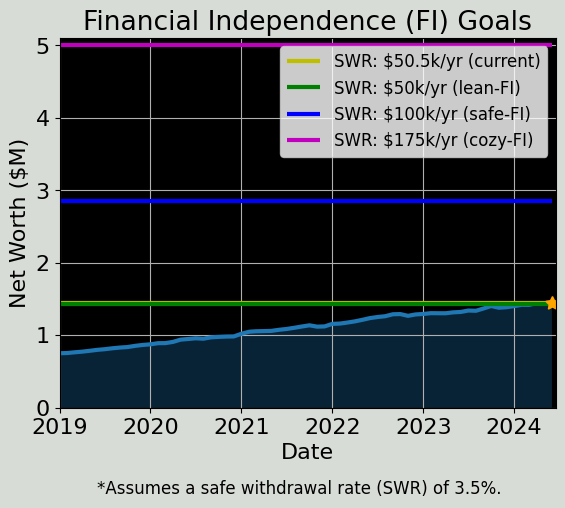

In [9]:
# Example usage:
plot_fi_goals(net_worth_list,
              date_list,
              swr = 0.035,
              lean_swr = 50,
              safe_swr = 100,
              cozy_swr = 175,
              end_date = today)

### Plot Net Worth

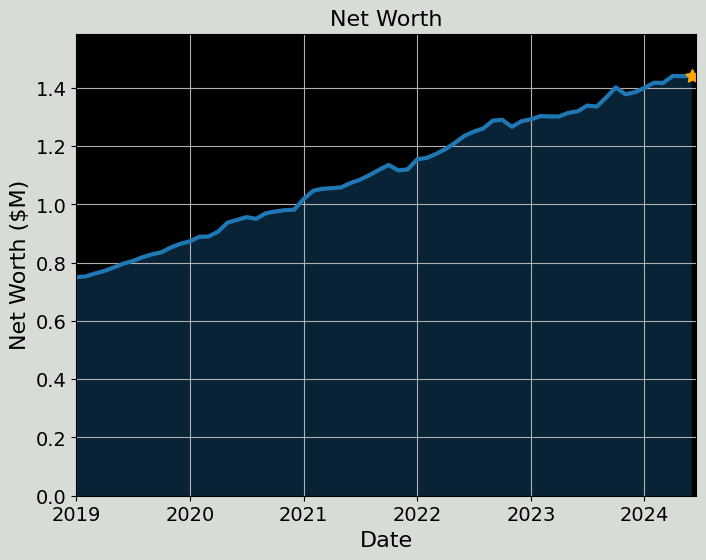

In [10]:
# Example usage:
plot_net_worth(date_list, net_worth_list, end_date=datetime.today())